#**Logistic Regression**

In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Each object being detected in the image would be assigned a probability between 0 and 1, with a sum of one.

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression[1] (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1". 

##**1-Basic**

In [ ]:
# First let’s load the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt    # more on this later

In [ ]:
# Next, we read the data (the necessary data is available under week-3 content)
data = pd.read_csv('ex2data1.txt', header = None)
X = data.iloc[:,:-1]
y = data.iloc[:,2]
data.head()


,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


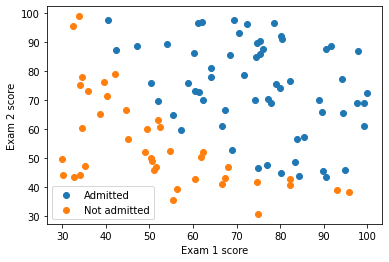

In [ ]:
# Visualizing the data
# Before starting to implement any learning algorithm, it is always good to visualize the data
# Mask is used to plot data with missing values.
mask = y == 1
adm = plt.scatter(X[mask][0].values, X[mask][1].values)
not_adm = plt.scatter(X[~mask][0].values, X[~mask][1].values)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
plt.show()

In [ ]:
# Before you start with the actual cost function, recall that the logistic regression hypothesis makes use of sigmoid function. Let’s define our sigmoid function.
# Sigmoid Function
def sigmoid(x):
  return 1/(1+np.exp(-x))

sigmoid(1)

0.7310585786300049

In [ ]:
# Let’s implement the cost function for the Logistic Regression.
# @ will return matrix product of two array 
def costFunction(theta, X, y):
    J = (-1/m) * np.sum(np.multiply(y, np.log(sigmoid(X @ theta)))
        + np.multiply((1-y), np.log(1 - sigmoid(X @ theta))))
    return J

In [ ]:
# Gradient Function
def gradient(theta, X, y):
    return ((1/m) * X.T @ (sigmoid(X @ theta) - y))

In [ ]:
# Let’s call these functions using the initial parameters.
(m, n) = X.shape
X = np.hstack((np.ones((m,1)), X))
y = y[:, np.newaxis]
theta = np.zeros((n+1,1)) # intializing theta with all zeros
J = costFunction(theta, X, y)
J

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


0.6931471805599453

In [ ]:
# Concretely, you are going to use fmin_tnc to find the best or optimal parameters theta for
# the logistic regression cost function, given a fixed dataset (of X and y values). You will
# pass to fmin_tnc the following inputs:
# The initial values of the parameters we are trying to optimize.
# A function that, when given the training set and a particular theta, computes the
# logistic regression cost and gradient with respect to theta for the dataset (X, y).
temp = opt.fmin_tnc(func = costFunction,
                    x0 = theta.flatten(),fprime = gradient,
                    args = (X, y.flatten()))

# Note on flatten() function: Unfortunately scipy’s fmin_tnc doesn’t work well with column
# or row vector. It expects the parameters to be in an array format. The flatten() function
# reduces a column or row vector into array format.the output of above function is a tuple
# whose first element #contains the optimized values of theta
theta_optimized = temp[0]
print(theta_optimized)


[-25.16131855   0.20623159   0.20147149]


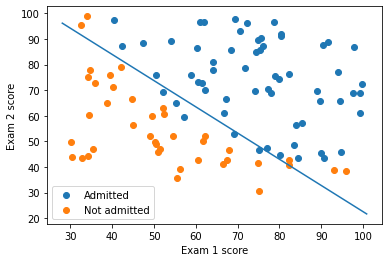

In [ ]:
# Plotting Decision Boundary (Optional)
# This final theta value will then be used to plot the decision boundary on the training data,
# resulting in a figure similar to the one below.
plot_x = [np.min(X[:,1]-2), np.max(X[:,2]+2)]
plot_y = -1/theta_optimized[2]*(theta_optimized[0]
          + np.dot(theta_optimized[1],plot_x))
mask = y.flatten() == 1
adm = plt.scatter(X[mask][:,1], X[mask][:,2])
not_adm = plt.scatter(X[~mask][:,1], X[~mask][:,2])
decision_boun = plt.plot(plot_x, plot_y)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
plt.show()


In [ ]:
# Now lets quantify our model accuracy for which we will write a function rightly called accuracy
def accuracy(X, y, theta, cutoff):
    pred = [sigmoid(np.dot(X, theta)) >= cutoff]
    acc = np.mean(pred == y)
    print(acc * 100)
accuracy(X, y.flatten(), theta_optimized, 0.5)


89.0


##**2-Regularized**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt    # more on this later

In [ ]:
data = pd.read_csv('ex2data2.txt', header = None)
X = data.iloc[:,:-1]
y = data.iloc[:,2]
data.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


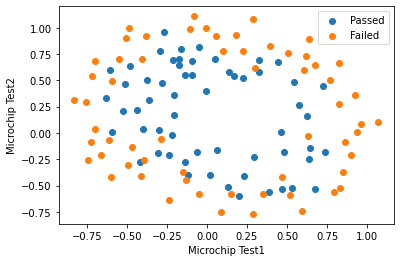

In [ ]:
# Before starting to implement any learning algorithm, it is always good to visualize the data if possible.
mask = y == 1
passed = plt.scatter(X[mask][0].values, X[mask][1].values)
failed = plt.scatter(X[~mask][0].values, X[~mask][1].values)
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()

In [ ]:
# One way to fit the data better is to create more features from each data point. Hence we
# will map the features into all polynomial terms of x1 and x2 up to the sixth power.
# As a result of this mapping, our vector of two features (the scores on two QA tests) has
# been transformed into a 28-dimensional vector.
# While the feature mapping allows us to build a more expressive classifier, it is also more
# susceptible to over fitting. In the next parts of the exercise, you will implement
# regularized logistic regression to fit the data and also see for yourself how
# regularization can help combat the over fitting problem.
def mapFeature(X1, X2):
    degree = 6
    out = np.ones(X.shape[0])[:,np.newaxis]
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j),                                     np.power(X2, j))[:,np.newaxis]))
    return out
X = mapFeature(X.iloc[:,0], X.iloc[:,1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [ ]:
# Sigmoid Function
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [ ]:
# Cost Function As usual lets code our cost function and gradient functions.
def lrCostFunction(theta_t, X_t, y_t, lambda_t):
    m = len(y_t)
    J = (-1/m) * (y_t.T @ np.log(sigmoid(X_t @ theta_t)) + (1 - y_t.T) @ np.log(1 - sigmoid(X_t @ theta_t)))
    reg = (lambda_t/(2*m)) * (theta_t[1:].T @ theta_t[1:])
    J = J + reg
    return J

In [ ]:
# Gradient Function
def lrGradientDescent(theta, X, y, lambda_t):
    m = len(y)
    grad = np.zeros([m,1])
    grad = (1/m) * X.T @ (sigmoid(X @ theta) - y)
    grad[1:] = grad[1:] + (lambda_t / m) * theta[1:]
    return grad

In [ ]:
# Let’s call these functions using the initial parameters.
(m, n) = X.shape
y = y[:, np.newaxis]
theta = np.zeros((n,1))
lmbda = 1
J = lrCostFunction(theta, X, y, lmbda)
print(J)

#Similar to previous post we will make use of fmin_tnc. fmin_tnc is an optimization solver that finds the minimum of an unconstrained function. For logistic regression, you want to optimize the cost function with the parameters theta.
output = opt.fmin_tnc(func = lrCostFunction, x0 = theta.flatten(), fprime = lrGradientDescent, \
                         args = (X, y.flatten(), lmbda))
theta = output[0]
print(theta) # theta contains the optimized values

[[0.69314718]]
[ 1.27271026  0.62529964  1.18111686 -2.01987399 -0.91743189 -1.43166928
  0.12393227 -0.36553118 -0.35725404 -0.17516291 -1.45817009 -0.05098418
 -0.61558555 -0.27469165 -1.19271298 -0.24217841 -0.20603299 -0.04466178
 -0.2777895  -0.29539513 -0.45645981 -1.04319154  0.02779373 -0.29244869
  0.0155576  -0.32742405 -0.14389149 -0.92467488]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Lets try to find the model accuracy by predicting the outcomes from our learned parameters
# and then comparing with the original outcomes.
pred = [sigmoid(np.dot(X, theta)) >= 0.5]
np.mean(pred == y.flatten()) * 100

83.05084745762711

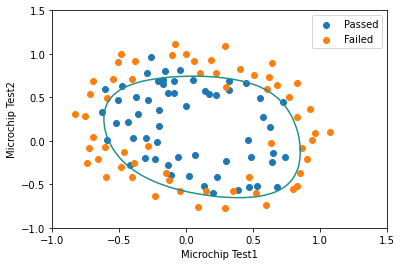

In [ ]:
# To help you visualize the model learned by this classifier, we will plot the (non-linear) decision boundary that separates the positive and negative examples. We plot the non-linear decision boundary by computing the classifier’s predictions on an evenly spaced grid and then drew a contour plot of where the predictions change from y = 0 to y = 1.
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))
def mapFeatureForPlotting(X1, X2):
    degree = 6
    out = np.ones(1)
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j), np.power(X2, j))))
    return out
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(mapFeatureForPlotting(u[i], v[j]), theta)
mask = y.flatten() == 1
X = data.iloc[:,:-1]
passed = plt.scatter(X[mask][0], X[mask][1])
failed = plt.scatter(X[~mask][0], X[~mask][1])
plt.contour(u,v,z,0)
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()


##**3-One-Vs-All**

In [ ]:
# First, let’s load the necessary libraries.
from scipy.io import loadmat
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [ ]:
# Reading the data
data = loadmat('ex3data1.mat')
X = data['X']
y = data['y']
X

error: ignored

KeyError: ignored

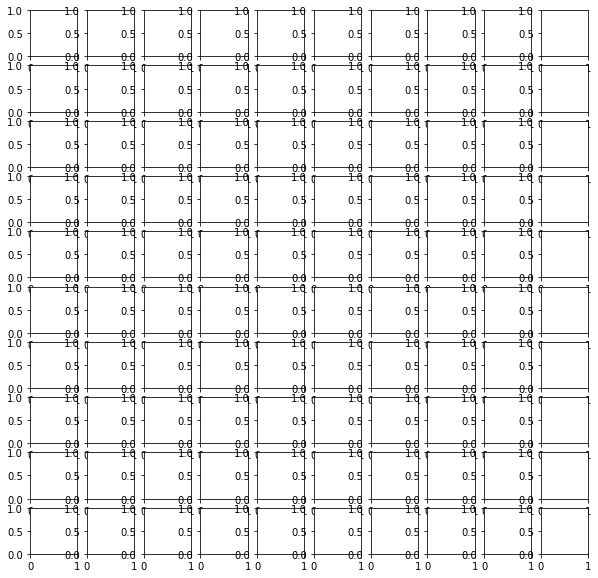

In [ ]:
# Visualizing the data
_, axarr = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
       axarr[i,j].imshow(X[np.random.randint(X.shape[0])].\
reshape((20,20), order = 'F'))
       axarr[i,j].axis('off')

In [ ]:
# Adding the intercept term
m = len(y)
ones = np.ones((m,1))
X = np.hstack((ones, X)) #add the intercept
(m,n) = X.shape

In [ ]:
import numpy as np
import time
a = np.random.rand(1000000)
b = np.random.rand(1000000)
c = 0
tic = time.time()
for i in range(1000000):
  c += a[i] * b[i]
toc = time.time()
print("value of c {0:.5f}".format(c))
print("time taken using for-loop " + str(1000*(toc-tic)) + " ms")
c = 0
tic = time.time()
c = np.dot(a,b) # no for-loops in vectorized version
toc = time.time()
print("value of c {0:.5f}".format(c))
print("time taken using vectorized operation " + str(1000*(toc-tic)) + " ms")


value of c 250031.60875
time taken using for-loop 567.8856372833252 ms
value of c 250031.60875
time taken using vectorized operation 1.9855499267578125 ms


In [ ]:
# Since we know that Logistic Regression uses sigmoid function, we will implement this first:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [ ]:
# Vectorized Cost Function:
def costFunctionReg(theta, X, y, lmbda):
    m = len(y)
    temp1 = np.multiply(y, np.log(sigmoid(np.dot(X, theta))))
    temp2 = np.multiply(1-y, np.log(1-sigmoid(np.dot(X, theta))))
    return np.sum(temp1 + temp2) / (-m) + np.sum(theta[1:]**2) * lmbda / (2*m)

In [ ]:
# Vectorized gradient:
def gradRegularization(theta, X, y, lmbda):
    m = len(y)
    temp = sigmoid(np.dot(X, theta)) - y
    temp = np.dot(temp.T, X).T / m + theta * lmbda / m
    temp[0] = temp[0] - theta[0] * lmbda / m
    return temp

In [ ]:
# Optimizing Parameters
# Here we will make use of an advanced numerical optimization library function called
# fmin_cg from thescipy library to find the optimal values for our parameters.
lmbda = 0.1
k = 10
theta = np.zeros((k,n)) #inital parameters
for i in range(k):
    digit_class = i if i else 10
    theta[i] = opt.fmin_cg(f = costFunctionReg, x0 = theta[i],  fprime = gradRegularization,
                           args = (X, (y == digit_class).flatten(), lmbda), maxiter = 50)

pred = np.argmax(X @ theta.T, axis = 1)
pred = [e if e else 10 for e in pred]
np.mean(pred == y.flatten()) * 100